In [133]:
#import the necessary files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [134]:
data = pd.read_csv("Mall_Customers.csv")

In [135]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [136]:
print(data.shape)
data.info()

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [137]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


## Visualizations

### Univariate Analysis

In [138]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


C:\Users\balas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CustomerID', ylabel='Density'>

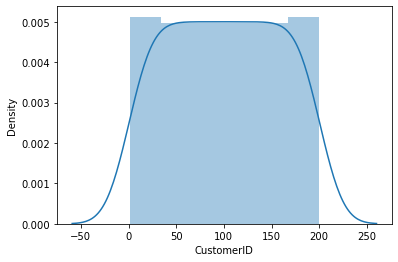

In [139]:
sns.distplot(data['CustomerID'])

<AxesSubplot:xlabel='CustomerID', ylabel='Count'>

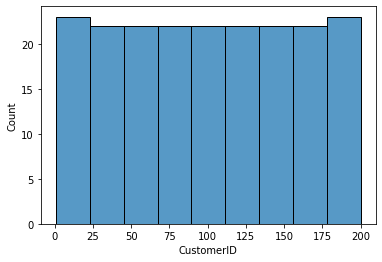

In [140]:
sns.histplot(data['CustomerID'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustomerID'>

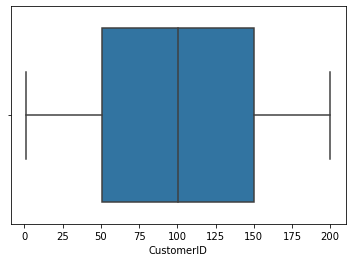

In [141]:
sns.boxplot(data['CustomerID'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

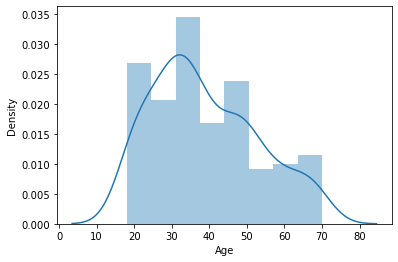

In [142]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

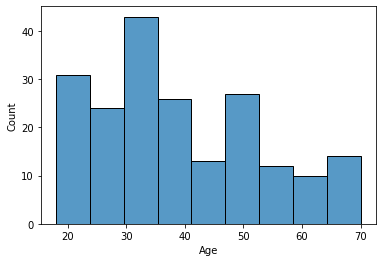

In [143]:
sns.histplot(data['Age'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

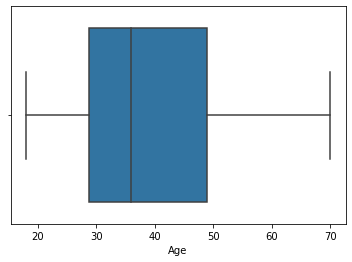

In [144]:
sns.boxplot(data['Age'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

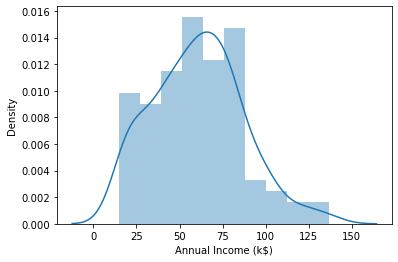

In [145]:
sns.distplot(data['Annual Income (k$)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

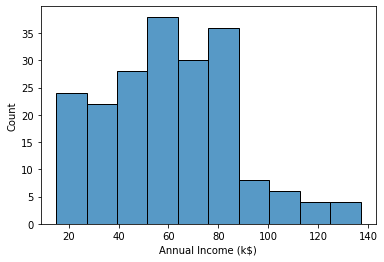

In [146]:
sns.histplot(data['Annual Income (k$)'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

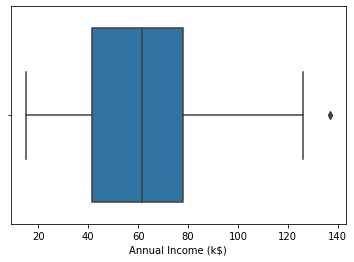

In [147]:
sns.boxplot(data['Annual Income (k$)'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

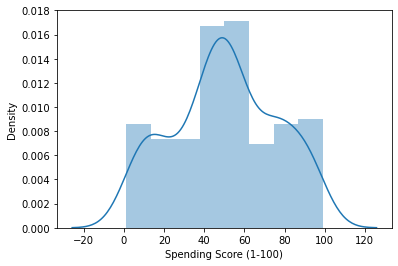

In [148]:
sns.distplot(data['Spending Score (1-100)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

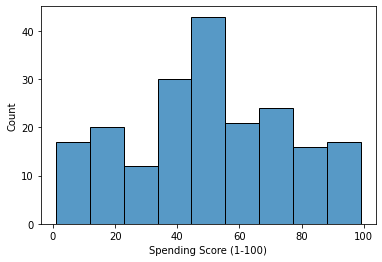

In [149]:
sns.histplot(data['Spending Score (1-100)'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)'>

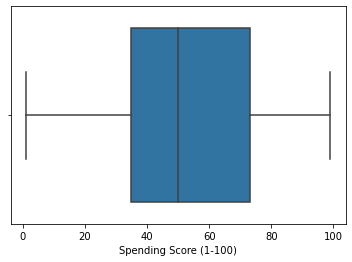

In [150]:
sns.boxplot(data['Spending Score (1-100)'])

### Bivariate Analysis

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='CustomerID'>

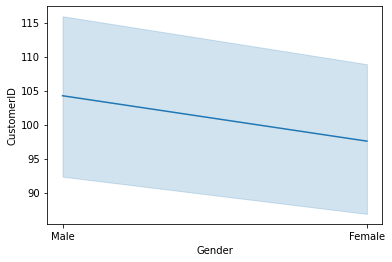

In [151]:
sns.lineplot(data['Gender'], data['CustomerID'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='CustomerID'>

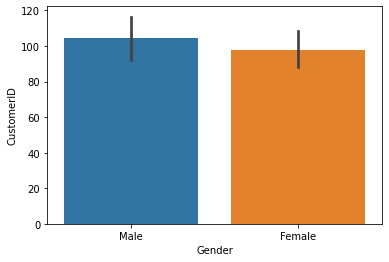

In [152]:
sns.barplot(data['Gender'], data['CustomerID'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='CustomerID'>

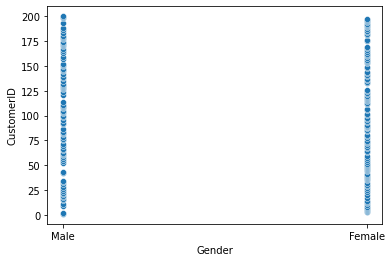

In [153]:
sns.scatterplot(data['Gender'], data['CustomerID'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

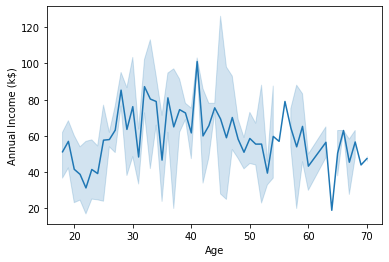

In [154]:
sns.lineplot(data['Age'], data['Annual Income (k$)'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

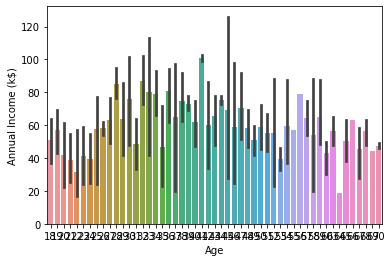

In [155]:
sns.barplot(data['Age'], data['Annual Income (k$)'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

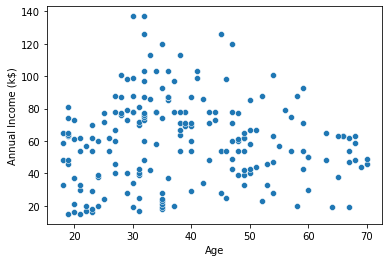

In [156]:
sns.scatterplot(data['Age'], data['Annual Income (k$)'])

### Multivariate Analysis

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustomerID', ylabel='Age'>

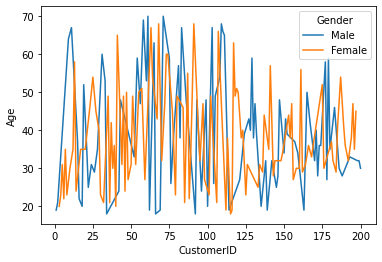

In [157]:
sns.lineplot(data['CustomerID'], data['Age'], hue = data['Gender'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustomerID', ylabel='Age'>

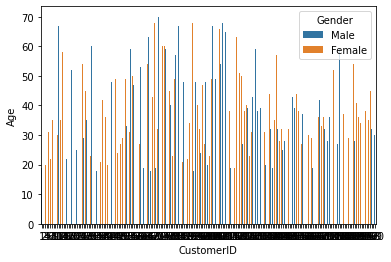

In [158]:
sns.barplot(data['CustomerID'], data['Age'], hue = data['Gender'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustomerID', ylabel='Age'>

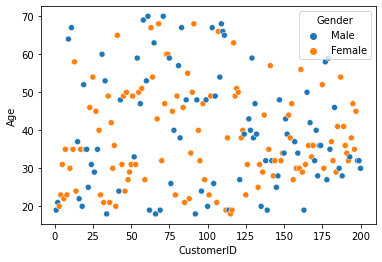

In [159]:
sns.scatterplot(data['CustomerID'], data['Age'], hue = data['Gender'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

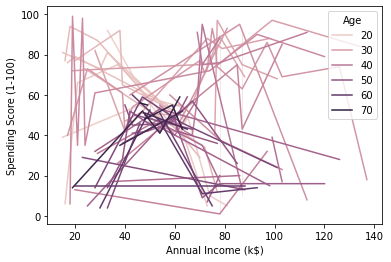

In [160]:
sns.lineplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], hue = data['Age'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

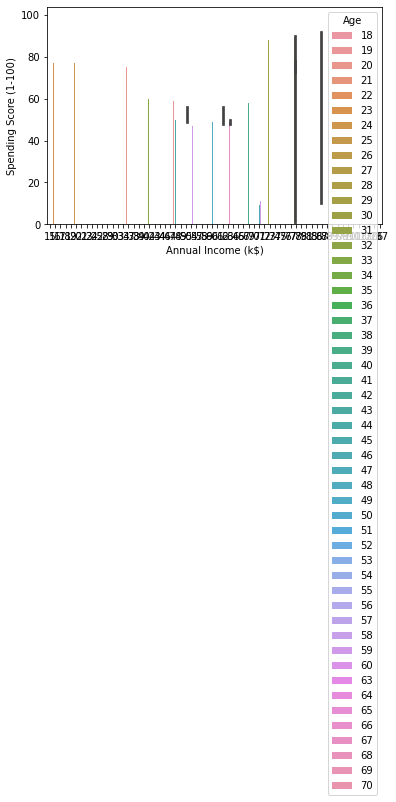

In [161]:
sns.barplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], hue = data['Age'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

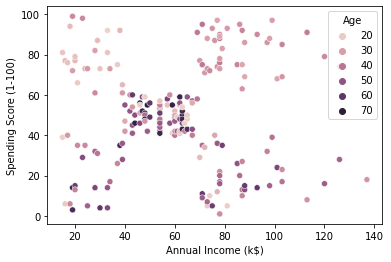

In [162]:
sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], hue = data['Age'])

### Descriptive statistics

In [163]:
data.mean()

C:\Users\balas\AppData\Local\Temp\ipykernel_12512\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [164]:
data.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [165]:
data.median()

C:\Users\balas\AppData\Local\Temp\ipykernel_12512\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [166]:
data.var()

C:\Users\balas\AppData\Local\Temp\ipykernel_12512\445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


CustomerID                3350.000000
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

In [167]:
data.std()

C:\Users\balas\AppData\Local\Temp\ipykernel_12512\2723740006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [168]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [169]:
data['Age'].unique ()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [170]:
data['Gender'].unique ()

array(['Male', 'Female'], dtype=object)

In [171]:
data['CustomerID'].unique ()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [172]:
data['Annual Income (k$)'].unique ()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [173]:
data['Spending Score (1-100)'].unique ()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18],
      dtype=int64)

### Check for Missing values and deal with them.

In [174]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [175]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [176]:
data.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [177]:
data['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [178]:
data['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64>

In [179]:
# replacing the null values 
data['Age'] = data['Age'].fillna(data['Age'].median())

In [180]:
data['Age']

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

### Find and Replace Outliers

In [181]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [182]:
data['Age'],data['Annual Income (k$)'].unique()

(0      19
 1      21
 2      20
 3      23
 4      31
        ..
 195    35
 196    45
 197    32
 198    32
 199    30
 Name: Age, Length: 200, dtype: int64,
 array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
         33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
         50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
         87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
       dtype=int64))

In [183]:
q = data.quantile([0.75,0.50])

In [184]:
q

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.75,150.25,49.0,78.0,73.0
0.50,100.50,36.0,61.5,50.0


In [185]:
iqr = q.iloc[0] - q.iloc[1]

In [186]:
iqr

CustomerID                49.75
Age                       13.00
Annual Income (k$)        16.50
Spending Score (1-100)    23.00
dtype: float64

In [187]:
u = q.iloc[0] + (1.5*iqr) # q3 + 1.5*iqr

In [188]:
u

CustomerID                224.875
Age                        68.500
Annual Income (k$)        102.750
Spending Score (1-100)    107.500
dtype: float64

In [189]:
l = q.iloc[1] - (1.5*iqr)

In [190]:
l

CustomerID                25.875
Age                       16.500
Annual Income (k$)        36.750
Spending Score (1-100)    15.500
dtype: float64

In [191]:
## handling outliers

data['Age'] = np.where(data['Age']>5,4,data['Age'])

C:\Users\balas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

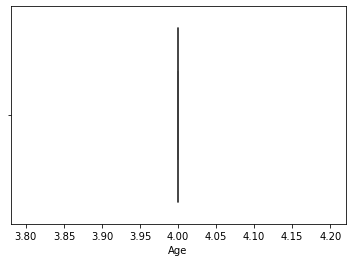

In [192]:
sns.boxplot(data['Age'])

### Check for Categorical columns and perform encoding.

In [193]:
# converting categorical values into numericalvalues - Encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
oneh = OneHotEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [194]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,4,15,39
1,2,1,4,15,81
2,3,0,4,16,6
3,4,0,4,16,77
4,5,0,4,17,40


### Scaling the data

In [195]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_scaled = mm.fit_transform(data)

In [196]:
x_scaled

array([[0.        , 1.        , 0.        , 0.        , 0.3877551 ],
       [0.00502513, 1.        , 0.        , 0.        , 0.81632653],
       [0.01005025, 0.        , 0.        , 0.00819672, 0.05102041],
       [0.01507538, 0.        , 0.        , 0.00819672, 0.7755102 ],
       [0.0201005 , 0.        , 0.        , 0.01639344, 0.39795918],
       [0.02512563, 0.        , 0.        , 0.01639344, 0.76530612],
       [0.03015075, 0.        , 0.        , 0.02459016, 0.05102041],
       [0.03517588, 0.        , 0.        , 0.02459016, 0.94897959],
       [0.04020101, 1.        , 0.        , 0.03278689, 0.02040816],
       [0.04522613, 0.        , 0.        , 0.03278689, 0.7244898 ],
       [0.05025126, 1.        , 0.        , 0.03278689, 0.13265306],
       [0.05527638, 0.        , 0.        , 0.03278689, 1.        ],
       [0.06030151, 0.        , 0.        , 0.04098361, 0.14285714],
       [0.06532663, 0.        , 0.        , 0.04098361, 0.7755102 ],
       [0.07035176, 1.        , 0.

### Perform any of the clustering algorithms

In [197]:
from sklearn.cluster import KMeans
km = KMeans()
clus = km.fit_predict(x_scaled)

In [198]:
clus

array([4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 1, 4, 4,
       1, 4, 1, 4, 1, 4, 1, 1, 4, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1, 3, 1, 3, 3, 3, 2, 2, 3, 3,
       2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3,
       3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 7, 2, 5, 3, 7, 0, 7, 0, 7,
       2, 5, 0, 5, 6, 7, 0, 5, 6, 7, 6, 5, 0, 7, 0, 5, 6, 7, 0, 7, 6, 5,
       6, 5, 0, 5, 0, 5, 6, 5, 0, 5, 0, 5, 0, 5, 6, 7, 0, 7, 0, 7, 6, 5,
       0, 7, 0, 7, 6, 5, 0, 5, 6, 7, 6, 7, 6, 5, 6, 5, 0, 5, 6, 5, 6, 7,
       0, 7])

In [199]:
names = data.columns

In [200]:
names

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [201]:
data1 = pd.DataFrame(x_scaled, columns=names)

In [202]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.0,0.000000,0.387755
1,0.005025,1.0,0.0,0.000000,0.816327
2,0.010050,0.0,0.0,0.008197,0.051020
3,0.015075,0.0,0.0,0.008197,0.775510
4,0.020101,0.0,0.0,0.016393,0.397959


### Add the cluster data with the primary dataset

In [203]:
data1['New clus'] = pd.Series(clus)

In [204]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),New clus
0,0.000000,1.0,0.0,0.000000,0.387755,4
1,0.005025,1.0,0.0,0.000000,0.816327,4
2,0.010050,0.0,0.0,0.008197,0.051020,1
3,0.015075,0.0,0.0,0.008197,0.775510,1
4,0.020101,0.0,0.0,0.016393,0.397959,1


### Split the data into dependent and independent variables

In [205]:
data.shape

(200, 5)

In [206]:
x = data.iloc[:, 0:5]

In [207]:
x

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,4,15,39
1,2,1,4,15,81
2,3,0,4,16,6
3,4,0,4,16,77
4,5,0,4,17,40
...,...,...,...,...,...
195,196,0,4,120,79
196,197,0,4,126,28
197,198,1,4,126,74
198,199,1,4,137,18


In [208]:
y = data['Spending Score (1-100)']

In [209]:
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

### Split the data into training and testing

In [210]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x_scaled, y, test_size = 0.5, random_state = 0)

In [211]:
x_train

array([[0.79396985, 1.        , 0.        , 0.51639344, 0.        ],
       [0.95979899, 0.        , 0.        , 0.72131148, 0.69387755],
       [0.25125628, 0.        , 0.        , 0.22131148, 0.52040816],
       [0.        , 1.        , 0.        , 0.        , 0.3877551 ],
       [0.47236181, 0.        , 0.        , 0.36885246, 0.41836735],
       [0.55276382, 1.        , 0.        , 0.39344262, 0.52040816],
       [0.47738693, 1.        , 0.        , 0.36885246, 0.52040816],
       [0.32160804, 1.        , 0.        , 0.2704918 , 0.51020408],
       [0.83919598, 0.        , 0.        , 0.58196721, 0.95918367],
       [0.20603015, 1.        , 0.        , 0.18852459, 0.92857143],
       [0.34673367, 0.        , 0.        , 0.2704918 , 0.46938776],
       [0.24623116, 0.        , 0.        , 0.20491803, 0.41836735],
       [0.24120603, 0.        , 0.        , 0.20491803, 0.41836735],
       [0.42713568, 1.        , 0.        , 0.31967213, 0.45918367],
       [0.06532663, 0.        , 0.

In [212]:
x_train.shape

(100, 5)

In [213]:
x_test

array([[0.09045226, 1.        , 0.        , 0.06557377, 0.28571429],
       [0.85427136, 1.        , 0.        , 0.59016393, 0.12244898],
       [0.53768844, 1.        , 0.        , 0.39344262, 0.45918367],
       [0.49246231, 1.        , 0.        , 0.37704918, 0.41836735],
       [0.88944724, 1.        , 0.        , 0.59836066, 0.69387755],
       [0.91457286, 1.        , 0.        , 0.68032787, 0.14285714],
       [0.02512563, 0.        , 0.        , 0.01639344, 0.76530612],
       [0.73366834, 1.        , 0.        , 0.50819672, 0.35714286],
       [0.06030151, 0.        , 0.        , 0.04098361, 0.14285714],
       [0.7638191 , 0.        , 0.        , 0.51639344, 0.19387755],
       [0.30653266, 1.        , 0.        , 0.25409836, 0.55102041],
       [0.6281407 , 0.        , 0.        , 0.45081967, 0.7755102 ],
       [0.90452261, 0.        , 0.        , 0.67213115, 0.31632653],
       [0.77386935, 0.        , 0.        , 0.51639344, 0.15306122],
       [0.40201005, 1.        , 0.

In [214]:
x_test.shape

(100, 5)

In [215]:
y_train

158     1
191    69
50     52
0      39
94     42
       ..
67     48
192     8
117    59
47     47
172    10
Name: Spending Score (1-100), Length: 100, dtype: int64

In [216]:
y_train.shape

(100,)

In [217]:
y_test

18     29
170    13
107    46
98     42
177    69
       ..
178    14
175    86
126    35
93     40
112    42
Name: Spending Score (1-100), Length: 100, dtype: int64

In [218]:
y_test.shape

(100,)

### Build the Model

In [219]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100)
regr.fit(x_train, y_train)
regr.fit(x_test, y_test)

RandomForestRegressor(max_depth=2, random_state=0)

In [220]:
y_train_pred = regr.predict(x_train)
y_test_pred = regr.predict(x_test)

In [221]:
regr.score(x_train, y_train)

0.9752947343811537

In [222]:
regr.score(x_test, y_test)

0.9790787065797374

### Train and Test

In [223]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x_scaled, y, test_size = 0.3, random_state = 0)

In [224]:
x_train

array([[0.65829146, 1.        , 0.        , 0.45901639, 0.75510204],
       [0.48241206, 0.        , 0.        , 0.36885246, 0.46938776],
       [0.90954774, 0.        , 0.        , 0.67213115, 0.86734694],
       [0.09547739, 0.        , 0.        , 0.06557377, 0.98979592],
       [0.76884422, 0.        , 0.        , 0.51639344, 0.76530612],
       [0.46231156, 1.        , 0.        , 0.36885246, 0.48979592],
       [0.27135678, 0.        , 0.        , 0.2295082 , 0.44897959],
       [0.81909548, 0.        , 0.        , 0.54098361, 0.93877551],
       [0.25628141, 1.        , 0.        , 0.22131148, 0.60204082],
       [0.4321608 , 0.        , 0.        , 0.3442623 , 0.58163265],
       [0.69849246, 0.        , 0.        , 0.48360656, 0.7244898 ],
       [0.45226131, 0.        , 0.        , 0.36065574, 0.55102041],
       [0.68844221, 1.        , 0.        , 0.47540984, 0.73469388],
       [0.50753769, 0.        , 0.        , 0.3852459 , 0.47959184],
       [0.72361809, 1.        , 0.

In [225]:
x_test

array([[0.09045226, 1.        , 0.        , 0.06557377, 0.28571429],
       [0.85427136, 1.        , 0.        , 0.59016393, 0.12244898],
       [0.53768844, 1.        , 0.        , 0.39344262, 0.45918367],
       [0.49246231, 1.        , 0.        , 0.37704918, 0.41836735],
       [0.88944724, 1.        , 0.        , 0.59836066, 0.69387755],
       [0.91457286, 1.        , 0.        , 0.68032787, 0.14285714],
       [0.02512563, 0.        , 0.        , 0.01639344, 0.76530612],
       [0.73366834, 1.        , 0.        , 0.50819672, 0.35714286],
       [0.06030151, 0.        , 0.        , 0.04098361, 0.14285714],
       [0.7638191 , 0.        , 0.        , 0.51639344, 0.19387755],
       [0.30653266, 1.        , 0.        , 0.25409836, 0.55102041],
       [0.6281407 , 0.        , 0.        , 0.45081967, 0.7755102 ],
       [0.90452261, 0.        , 0.        , 0.67213115, 0.31632653],
       [0.77386935, 0.        , 0.        , 0.51639344, 0.15306122],
       [0.40201005, 1.        , 0.

In [226]:
y_train

131    75
96     47
181    86
19     98
153    76
       ..
67     48
192     8
117    59
47     47
172    10
Name: Spending Score (1-100), Length: 140, dtype: int64

In [227]:
y_test

18     29
170    13
107    46
98     42
177    69
182    15
5      76
146    36
12     15
152    20
61     55
125    77
180    32
154    16
80     51
7      94
33     92
130     9
37     73
74     47
183    88
145    97
45     65
159    73
60     56
123    91
179    90
185    97
122    58
44     28
16     35
55     41
150    17
111    54
22      5
189    85
129    75
4      40
83     44
106    50
134     5
66     50
26     32
113    46
168    27
63     59
8       3
75     54
118    43
143    87
71     42
124    29
184    39
97     50
149    90
24     14
30      4
160    35
40     35
56     50
Name: Spending Score (1-100), dtype: int64

### Evaluation Metrics

In [228]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)


0.9718954898467616

In [229]:
#MAE
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 3.2810222489289385


In [230]:
#MSE
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 17.504352105571893


In [231]:
#RMSE
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 4.183820276442559


In [232]:
#RMSLE
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE 1.4312247708788837


In [234]:
# RSquared
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9755948089587156


In [235]:
#Adjusted RSquared
n=40
k=2
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.9742756094429705
